Example 2.1

Find the RMS value of the sinusoidal signal using both analytical (formula mean of continuous signal) and digital 
(formula for mean of digital signal) approaches.

In [6]:
import numpy as np

# Properties
N = 500 # number of points for waveform
Ts = 0.005 # samples interval is 5 msec
t = np.array(range(1,N+1))*Ts # Generate time vector where t=N*Ts. Here we create N = [1,2,3,4..] and then multiply by the sampling time which is 5 msec.
f = 1/ (Ts*N) # sine wave frequency for 1 cycle. Here total time is equal to sampling time multiplied by total number of points. The frequency is the 1/total time
A = 1 # sine wave amplitude

# Generate the sine wave and manually calculate the rms value
x = A*np.sin(2*np.pi*f*t) 
rms = np.sqrt(np.mean(x**2))
rms

0.7071067811865476

ExampLE 2.2

 Evaluate a signal to determine if it is stationary. If not, attempt to modify the signal to remove 
the nonstationarity, if possible. The file data_c1.mat contains the signal in variable x. The 
signal is 1000 points long and the sample interval is Ts
 = 0.001 s.

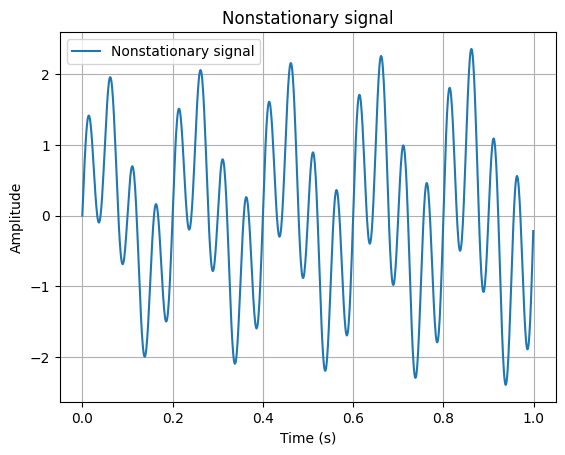

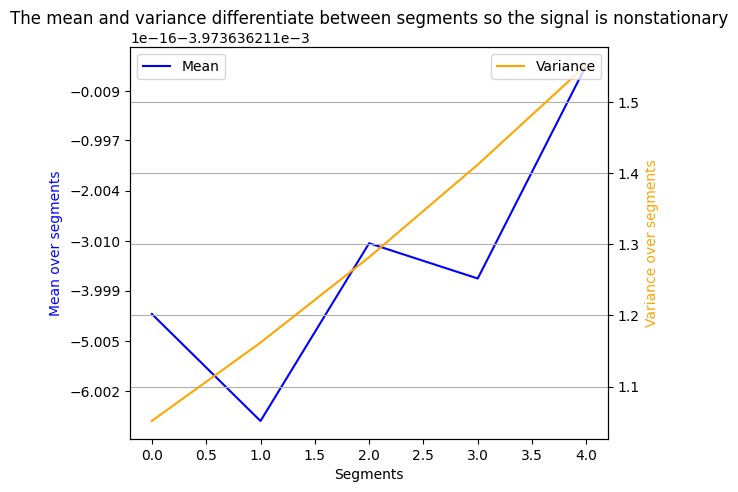

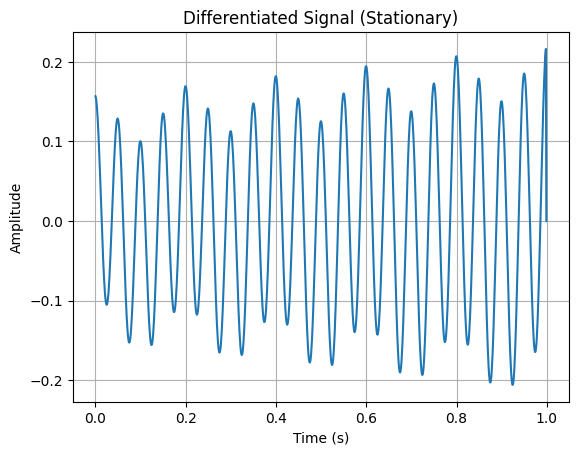

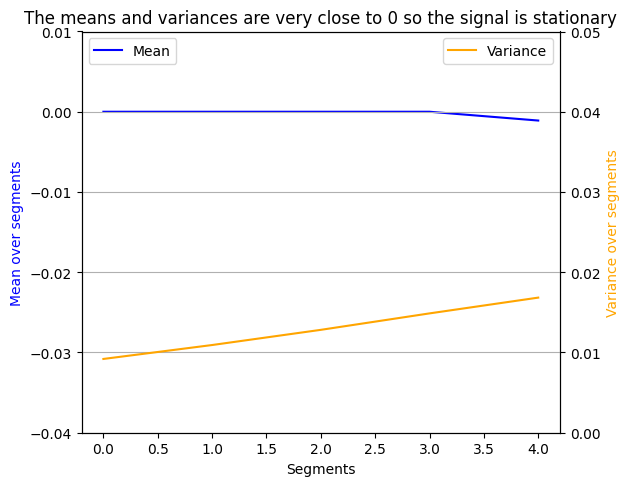

When applying np.diff to nonstationary signal, it effectively took the
discrete derivative of the nonstationary signal, which removes trends
(linear, non-linear) and time-varying components like amplitude
modulations. This can often result in a signal that appears more
stationary.


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import textwrap

# Parameters
N = 1000
Ts = 0.001
t = np.arange(0, N*Ts, Ts)

# Generate non-stationary signal since I don't have the data_c1.mat
f1 = 5 # Hz
f2 = 20 # Hz
x = np.sin(2*np.pi*f1*t) + (1+0.5*t)*np.sin(2*np.pi*f2*t)


# Plot the non-stationary signal
plt.figure()
plt.plot(t, x, label="Nonstationary signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Nonstationary signal")
plt.grid()
plt.legend()

# Checking if the signal is stationary or not
def check_stationarity(x, segment_len=200):

    num_segments = N //segment_len

    means = []
    variances = []

    for i in range(num_segments):
        segment_start = i*segment_len
        segment_stop = (i+1) * segment_len

        data_segment = x[segment_start:segment_stop]

        segment_mean  = np.mean(data_segment)
        segment_var = np.var(data_segment)

        means.append(segment_mean)
        variances.append(segment_var)
    return means, variances

means, variances = check_stationarity(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(means, label="Mean", c="blue")
ax1.legend(loc="upper left")
ax1.set_xlabel("Segments")
ax1.set_ylabel ("Mean over segments", color='blue')

ax2.plot(variances, c="orange", label="Variance")
ax2.legend(loc="upper right")
ax2.set_ylabel("Variance over segments", color='orange')
plt.tight_layout()
plt.title("The mean and variance differentiate between segments so the signal is nonstationary")
plt.grid()

# Detrend the signal to obtain stationary signal
x_diff = np.diff(x)
x_diff = np.append(x_diff, 0)

plt.figure()
plt.plot(t, x_diff)
plt.title("Differentiated Signal (Stationary)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Check the stationarity
means, variances = check_stationarity(x_diff)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(means, label="Mean", c="blue")
ax1.legend(loc="upper left")
ax1.set_xlabel("Segments")
ax1.set_ybound(-0.04,0.01)
ax1.set_ylabel ("Mean over segments", color='blue')

ax2.plot(variances, c="orange", label="Variance")
ax2.legend(loc="upper right")
ax2.set_ylabel("Variance over segments", color='orange')
ax2.set_ybound(0,0.05)
plt.tight_layout()
plt.title("The means and variances are very close to 0 so the signal is stationary")
plt.grid()
plt.show()

text = "When applying np.diff to nonstationary signal, it effectively took the discrete derivative of the nonstationary signal, which removes trends (linear, non-linear) and time-varying components like amplitude modulations. This can often result in a signal that appears more stationary."
print("\n".join(textwrap.wrap(text)))



